In [1]:
##1.Loading the dataset
## Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()

# Create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [3]:
##2.Preprocessing the data
##1. Missing Values: Checked for missing values, although none were found.
##2. Scaling: Used StandardScaler to standardize the dataset, which is beneficial for models like k-NN and SVM.

# Check for missing values
print(df.isnull().sum())

# If there were missing values, you could handle them like this:
# df.fillna(df.mean(), inplace=True)  # Fill with mean values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [ ]:
##Classification of algorithms
1. Logistic Regression:
Used for binary classification problems.
Outputs probabilities of class membership.
Works well when classes are linearly separable.
2. Decision Tree:
A tree-like model that splits the data into branches.
Easy to interpret, but prone to overfitting.
3. Random Forest:
An ensemble of decision trees.
Reduces overfitting and improves accuracy.
4. Support Vector Machine (SVM):
Finds the optimal hyperplane to separate classes.
Effective for high-dimensional data.
5. k-Nearest Neighbors (k-NN):
Classifies samples based on the majority vote of k nearest neighbors.
Sensitive to feature scaling.

In [6]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier()
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    results[name] = {
        "Accuracy": acc,
        "Report": report
    }
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(report)


Logistic Regression Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Decision Tree Accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Random Forest Accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97   

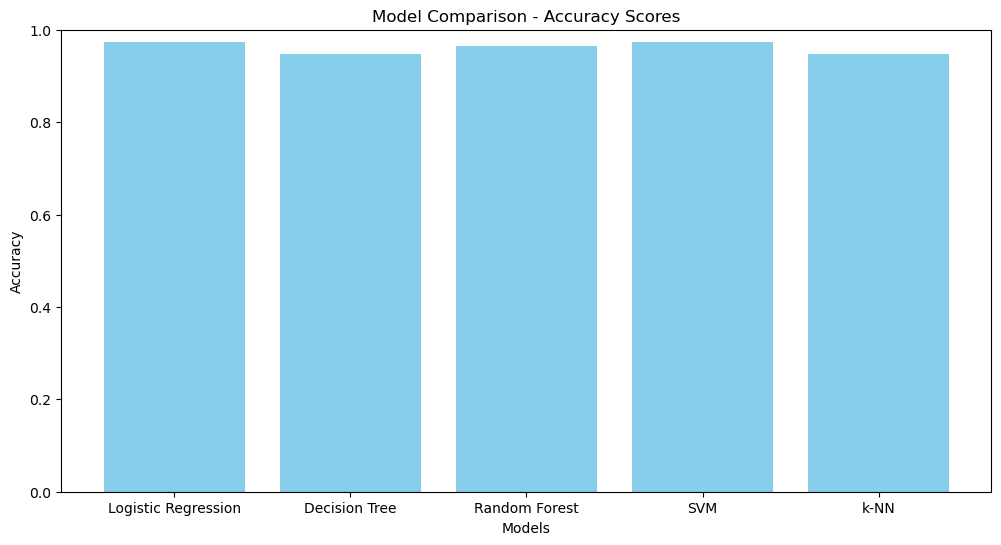


Best Performing Model: Logistic Regression - Accuracy: 0.9737
Worst Performing Model: Decision Tree - Accuracy: 0.9474


In [7]:
import matplotlib.pyplot as plt

# Extract accuracy scores
model_names = list(results.keys())
accuracy_scores = [results[name]["Accuracy"] for name in model_names]

# Plotting the accuracy comparison
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.title('Model Comparison - Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Identify the best and worst performing models
best_model = max(results, key=lambda x: results[x]["Accuracy"])
worst_model = min(results, key=lambda x: results[x]["Accuracy"])

print(f"\nBest Performing Model: {best_model} - Accuracy: {results[best_model]['Accuracy']:.4f}")
print(f"Worst Performing Model: {worst_model} - Accuracy: {results[worst_model]['Accuracy']:.4f}")

In [ ]:
##Random forest/SVM perform well on this dataset.